<a href="https://colab.research.google.com/github/crownvamsi/ML/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Naive Bayes

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(x)
print('\n')
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

##Split the data into train and test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)
print(x_train)
print('\n')
print(x_test)
print('\n')
print(y_train)
print('\n')
print(y_test)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =  sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train)
print('\n')
print(x_test)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

## Train the data with Naive bayes model

In [5]:
from sklearn.naive_bayes import GaussianNB
classification = GaussianNB()
classification.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## predict a new value

In [6]:
print(classification.predict([[30, 87000]]))

[1]


## Predict the test set

In [7]:
y_pred = classification.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
print(np.concatenate((y_pred, y_test),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Prepare the conusion matrix and accuracy summary

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[64  5]
 [ 4 27]]


0.91

## Visualize the data to see how it fits the report

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


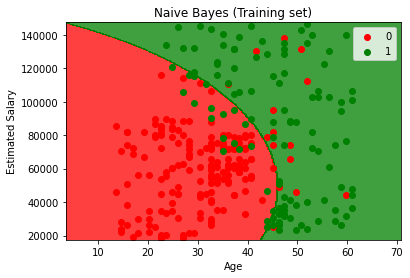

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classification.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##Visualize the data on the test set

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classification.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()